<a href="https://colab.research.google.com/github/MAchinetyro/Coderscave-Email-Spam-Detection/blob/main/emailspam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Email Spam Detection***
The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import nltk
from sklearn.preprocessing import LabelEncoder
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier


In [192]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,classification_report,recall_score,f1_score,confusion_matrix

In [193]:
df = pd.read_csv("spam.csv" , encoding ="ISO-8859-1")

In [194]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [195]:
df.sample()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
622,ham,MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...,NaN,NaN,NaN


In [196]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [197]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [198]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [199]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

In [200]:
df['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [201]:
df.duplicated().sum()

403

DROPPING EXTRA COLUMNS


In [202]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [203]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int64

In [204]:
df.head()

,Target,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


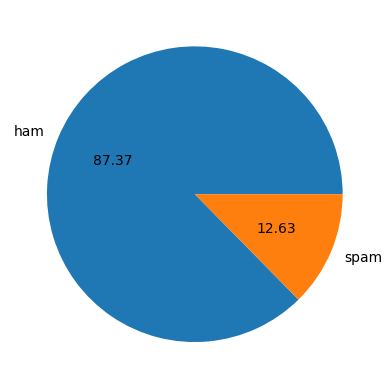

In [205]:
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [206]:
df['Target'].value_counts()


0    4516
1     653
Name: Target, dtype: int64

In [207]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [208]:
df['words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
df.sample(8)

,Target,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,words
2609,0,"Awesome, text me when you're restocked",NaN,NaN,NaN,8
3906,0,No that just means you have a fat head,NaN,NaN,NaN,9
1890,0,Ok but knackered. Just came home and went to s...,NaN,NaN,NaN,21
5536,0,Aiyah ok wat as long as got improve can alread...,NaN,NaN,NaN,12
518,0,That way transport is less problematic than on...,NaN,NaN,NaN,40
4660,0,Ok no prob...,NaN,NaN,NaN,4
2185,0,Purity of friendship between two is not about ...,NaN,NaN,NaN,26
3923,0,How? Izzit still raining?,NaN,NaN,NaN,6


In [209]:

df['sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
df.sample(8)

,Target,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,words,sentence
5228,1,PRIVATE! Your 2003 Account Statement for <fone...,NaN,NaN,NaN,27,3
2140,0,After the drug she will be able to eat.,NaN,NaN,NaN,10,1
4690,0,Surly ill give it to you:-) while coming to re...,NaN,NaN,NaN,14,1
1559,0,Single line with a big meaning::::: \Miss anyt...,don't miss ur best life for anything... Gud n...,NaN,NaN,21,1
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,9,1
1871,0,Dont know supports ass and srt i thnk. I think...,NaN,NaN,NaN,17,2
5327,0,Wishing you a wonderful week.,NaN,NaN,NaN,6,1
2838,0,"Easy mate, * guess the quick drink was bit amb...",NaN,NaN,NaN,12,1


In [210]:
df['chars']= df['Message'].apply(len)
df.sample(8)

,Target,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,words,sentence,chars
3502,0,Free any day but i finish at 6 on mon n thurs...,NaN,NaN,NaN,13,1,48
1017,0,Shall i send that exe to your mail id.,NaN,NaN,NaN,10,1,38
86,0,For real when u getting on yo? I only need 2 m...,NaN,NaN,NaN,30,3,121
3040,0,Aight what time you want me to come up?,NaN,NaN,NaN,10,1,39
2315,0,That's significant but dont worry.,NaN,NaN,NaN,7,1,34
3017,0,I didn't get the second half of that message,NaN,NaN,NaN,10,1,44
2757,0,Yo we are watching a movie on netflix,NaN,NaN,NaN,8,1,37
2187,0,Oh god. I'm gonna Google nearby cliffs now.,NaN,NaN,NaN,12,2,43


In [211]:
df[df['Target'] == 1][['words','sentence','chars']].describe()


,words,sentence,chars
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [212]:
df[df['Target'] == 0][['words','sentence','chars']].describe()


,words,sentence,chars
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


<ipython-input-213-de8c46037d9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')


[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

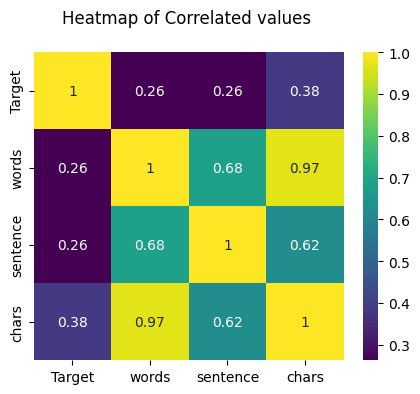

In [213]:
fig, ax = plt.subplots(figsize = (5, 4))
sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')


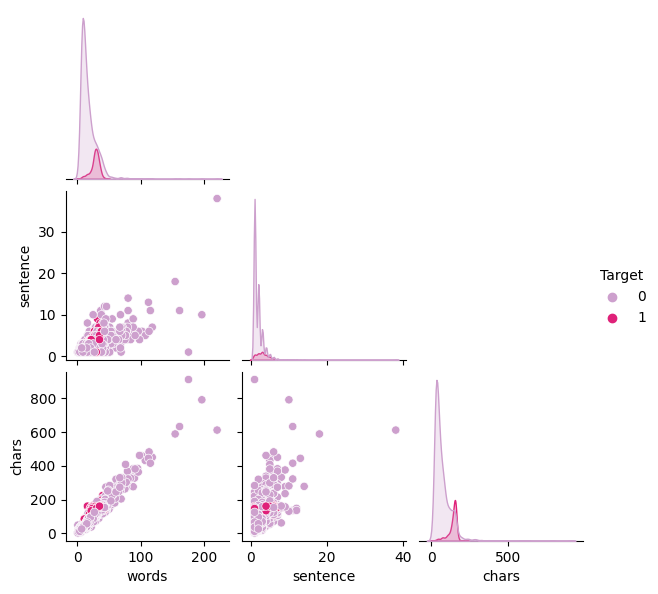

In [214]:
sea.pairplot(df,hue='Target',corner=True,height=2,palette='PuRd');

In [215]:

nltk.download('stopwords')
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [216]:

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [217]:
ps = PorterStemmer()
ps.stem

<bound method PorterStemmer.stem of <PorterStemmer>>

In [218]:
def changement(a):

    #LOWER CASE
    a = a.lower()

    #TOKENIZATION
    a = nltk.word_tokenize(a)

    #REMOVING SPECIAL CHARACTERS
    alphanum = []
    for i in a:
        if i.isalnum():
            alphanum.append(i)

    a = alphanum[:]
    alphanum.clear()

    #DELETE ALL STOPWORDS AND PUNCTUATION
    for i in a:
        if i not in stopwords.words('english') and i not in string.punctuation:
            alphanum.append(i)

    a = alphanum[:]
    alphanum.clear()

    #STEMMING
    for i in a:
        alphanum.append(ps.stem(i))


    return " ".join(alphanum)

In [219]:
changement("The only problem with a pencil, is that they do not stay sharp long enough?")


'problem pencil stay sharp long enough'

In [220]:
changement("Last Chance! Claim ur å£150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ.")


'last chanc claim ur worth discount voucher today text shop 85023 savamob offer mobil cs savamob pobox84 m263uz'

In [221]:
df['pre-processed'] = df['Message'].apply(changement)
df.tail(8)


,Target,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,words,sentence,chars,pre-processed
5564,0,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN,16,1,67,wait least wednesday see get
5565,0,Huh y lei...,NaN,NaN,NaN,4,1,12,huh lei
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,30,1,147,remind o2 get pound free call credit detail gr...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,35,4,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,9,1,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,15,2,57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,27,1,125,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,NaN,NaN,NaN,7,2,26,rofl true name


WORDCLOUDS

In [222]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

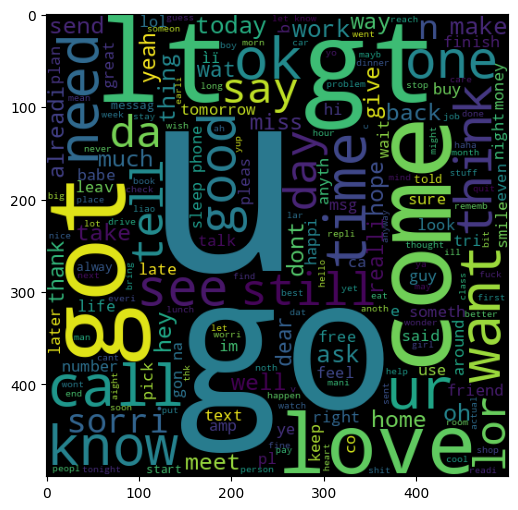

In [223]:
non_spam = wc.generate(df[df['Target'] == 0]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(non_spam)

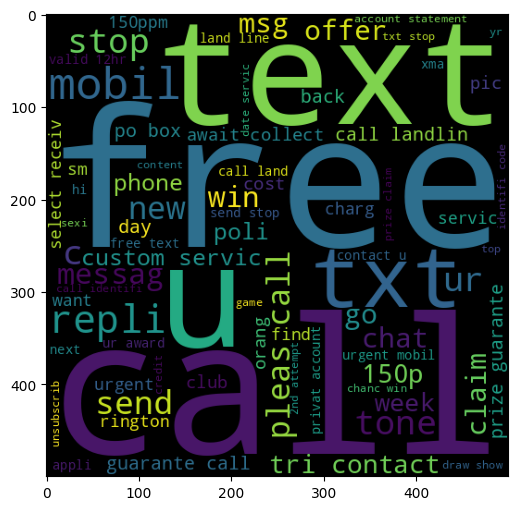

In [224]:

spam = wc.generate(df[df['Target'] == 1]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam)

Feature Extractor


In [225]:
y= df['Target'].values
x = df['pre-processed']

In [231]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [245]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=False)

In [246]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [249]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_features, y_train)



LogisticRegression()

***Model Evaluation***

In [251]:

prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.962273276904474


In [253]:

prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)


Accuracy on test data :  0.9477756286266924
